## Clustering NoteBook
Ethan Young - 954408  
**NOTE: yes I understand I don't need to have repeating code like the import/loading data etc, however I like to treat each new task as if they were their own separate projects/tasks**

# Lab 2
**Task 2.1 - Visualise The Iris Data set**  
In this task, we will first get used to the Iris dataset and its features by visualising the data with the help of loading in the data using numpy, exploring the data attributes, and then using matplotlib to plot a scatter graph to visualise any given 2 features of the iris data. Here we chose the first 2 features, sepal length and sepal width.

**Iris Data - Contains a 2 dimensional array of 600 items that consists of a 4-tuple floating point numbers**  
**Note: the 4 tuple contains - (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm)**  
ndim: 2  
shape: (150, 4)  
size: 600  
dType: float64  
itemsize: 8  
nbytes: 4800  

**Iris Labels - Contains a 1 dimensional array of 150 items that are integers in the set (0, 1, 2)**  
**Note: The integers (0, 1, 2) represent (Iris Setosa, Iris Versicolour, Iris Virginica)**  
ndim: 1  
shape: (150,)  
size: 150  
dType: int32  
itemsize: 4  
nbytes: 600  

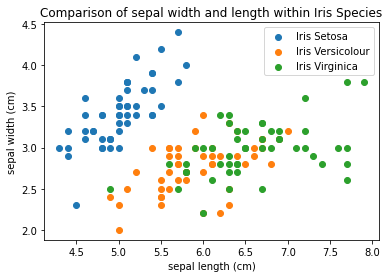

In [48]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load("Iris_data.npy")
labels = np.load("Iris_labels.npy")
species_names = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
features_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
x_feature = 0
y_feature = 1

plt.figure()
for label in np.unique(labels):
    plt.scatter(data[labels==label,x_feature], data[labels==label, y_feature], label=species_names[label])
plt.legend()
plt.xlabel(features_names[x_feature])
plt.ylabel(features_names[y_feature])
plt.title("Comparison of sepal width and length within Iris Species")
plt.show()

**Task 2.2 - K-Means - Unsupervised Clustering**  
In the second task, we learn to use KMeans clustering with the help of scikit-learn, where we first import the KMeans class. Using the class, we first need to fit the model to the data provided using fit() and then come up with the predictions of our dataset from KMeans using predict(). We plot then both the ground truths scatter graph (base dataset plot) and the predictions scatter graph using matplotlib and the scatter() Lastly adding in the cluster centers to the scatter graphs as well using cluster_centers_

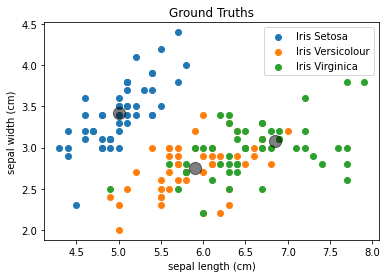

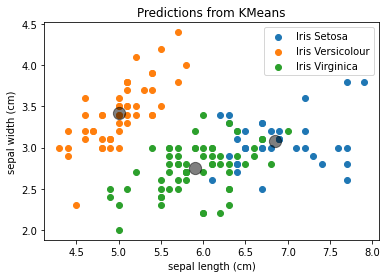

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = np.load("Iris_data.npy")
labels = np.load("Iris_labels.npy")
species_names = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
features_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
x_feature = 0
y_feature = 1

model = KMeans(n_clusters = 3, n_init=100)
model.fit(data)
predictions = model.predict(data)

plt.figure()
for label in np.unique(labels):
    plt.scatter(data[labels==label,x_feature], data[labels==label, y_feature], label=species_names[label])
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.legend()
plt.xlabel(features_names[x_feature])
plt.ylabel(features_names[y_feature])
plt.title("Ground Truths")
plt.show()

plt.figure()
for label in np.unique(predictions):
    plt.scatter(data[predictions==label,x_feature], data[predictions==label, y_feature], label=species_names[label])
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.legend()
plt.xlabel(features_names[x_feature])
plt.ylabel(features_names[y_feature])
plt.title("Predictions from KMeans")
plt.show()

**Task 2.3 - Gaussian Mixture Models**  
In this last task, we use the Gaussian Mixture model class from scikit-learn again, and the first initial sequence is the same. First fit the model to the Iris data using fit() then make predictions of the GMM on our dataset using predict(). We then plot both the scatter graphs for our ground truths and the predictions using matplotlib scatter(), where we also add a plot of the mean of each mixture component using means_ and the scatter(). Lastly we create a scatter plot of all of the posterior probabilities of the components in this case, we have 3 components, so there is 3 scatter graphs with colour bar and indicator to distinguish the scale of probability in the components.

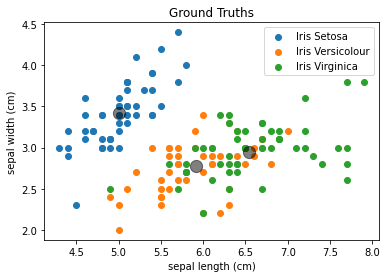

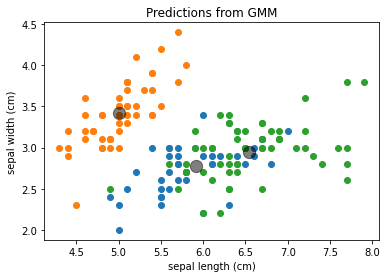

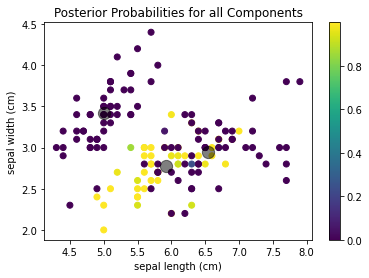

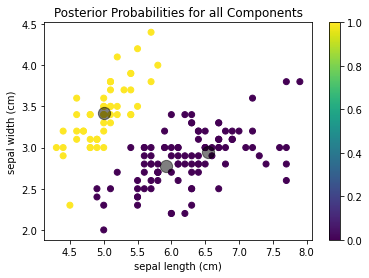

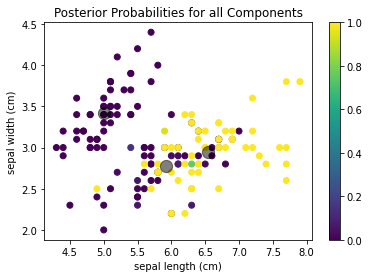

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
data = np.load("Iris_data.npy")
labels = np.load("Iris_labels.npy")
species_names = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
features_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
x_feature = 0
y_feature = 1

model = GaussianMixture(n_components = 3, n_init=100)
model.fit(data)
predictions = model.predict(data)

plt.figure()
for label in np.unique(labels):
    plt.scatter(data[labels==label,x_feature], data[labels==label, y_feature], label=species_names[label])
centers = model.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.legend()
plt.xlabel(features_names[x_feature])
plt.ylabel(features_names[y_feature])
plt.title("Ground Truths")
plt.show()

plt.figure()
for label in np.unique(predictions):
    plt.scatter(data[predictions==label,x_feature], data[predictions==label, y_feature], label=species_names[label])
centers = model.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.xlabel(features_names[x_feature])
plt.ylabel(features_names[y_feature])
plt.title("Predictions from GMM")
plt.show()

probabilities = model.predict_proba(data)
for component in range(model.n_components):
    plt.figure()
    plt.scatter(data[:, x_feature], data[:, y_feature], c=probabilities[:, component])
    plt.colorbar()
    plt.xlabel(features_names[x_feature])
    plt.ylabel(features_names[y_feature])
    plt.title("Posterior Probabilities for all Components")
    plt.show()